# Algoritmo de Regresión Logística

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import scipy.optimize as opt


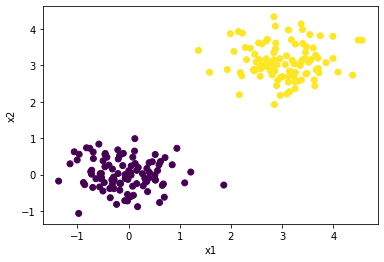

In [24]:
# Generar los datos

X,Y = make_blobs(n_samples=200, centers =[[0,0], [3,3]], cluster_std=0.5, n_features=2)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [29]:
# Función logística g(z)
def fun_log(z):
    return 1/(1+np.exp(-z))

# Funcion de regresion logística \hat{y}=hB(x)=g(B^T*X)
def reg_log(B,X):
    hB = np.matrix(X)*np.matrix(B).transpose()
    return np.array(fun_log(hB))[:,0]

#Fuuncion de costo
def fun_cost(B,X,Y):
    yhat = reg_log(B,X)
    J = np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))*(1/len(Y))
    return J


In [30]:
# Inicializar las variables para la optimización
# xa=[1;x]
# B=[B0,B1,...,Bn]
# y = B^T*Xa = B0 + B1x1 + B2x2

Xa=np.append(np.ones((len(Y),1)), X, axis=1)
m,n = np.shape(Xa)
B = np.zeros(n)

In [49]:
Xa

array([[ 1.00000000e+00,  6.81579201e-01, -2.56189567e-01],
       [ 1.00000000e+00,  3.45724266e+00,  3.35774455e+00],
       [ 1.00000000e+00, -6.85612640e-01,  4.41481128e-01],
       [ 1.00000000e+00, -5.54212410e-01,  2.53691275e-02],
       [ 1.00000000e+00,  4.97231922e-02, -1.37771192e-02],
       [ 1.00000000e+00,  2.60526005e+00,  3.59001760e+00],
       [ 1.00000000e+00, -5.63737247e-01, -3.36371865e-01],
       [ 1.00000000e+00, -2.08441977e-01,  6.81124243e-01],
       [ 1.00000000e+00, -2.84180215e-01, -3.83338332e-01],
       [ 1.00000000e+00,  5.25868622e-01, -1.49068611e-01],
       [ 1.00000000e+00,  5.33260907e-02,  2.39885177e-01],
       [ 1.00000000e+00,  3.72523812e-01, -4.64772995e-01],
       [ 1.00000000e+00,  3.18266297e+00,  3.70118287e+00],
       [ 1.00000000e+00,  3.18853562e+00,  2.76887715e+00],
       [ 1.00000000e+00,  2.68493903e+00,  3.03461649e+00],
       [ 1.00000000e+00, -8.19852651e-01,  7.37149549e-01],
       [ 1.00000000e+00,  1.61525481e-01

In [31]:
B

array([0., 0., 0.])

In [32]:
# Optimizcion por medio de la libreria opt.optimize
res = opt.minimize(fun_cost, B, args=(Xa,Y))
B = res.x 

/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/de

In [33]:
res.x


array([-5801.11515117,  1418.38833007,  1490.90898706])

In [34]:
B

array([-5801.11515117,  1418.38833007,  1490.90898706])

In [35]:
Yhat = reg_log(B,Xa)

/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
Yhat

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

In [37]:
x_new = [1, 3, 2.5]
Yhat_new = ?

SyntaxError: invalid syntax (<ipython-input-37-9f966a6518bc>, line 2)

In [43]:
x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)
Xm,Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xtmp = np.append(Xmr,Ymr,axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)),Xtmp,axis=1)
Ytmp = np.round(reg_log(B,Xtmp),0)

Z= np.reshape(Ytmp, (m,n))

In [44]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [45]:
reg_log(B,Xamr)

/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

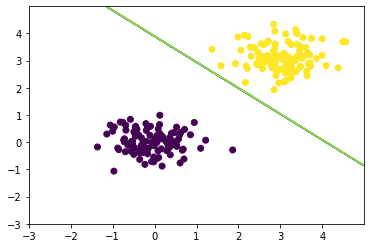

In [46]:
plt.contour(Xm,Ym,Z)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Descargar el dataset ex2dat2



In [47]:
data = pd.read_csv('../Data/ex2data2.txt',header=None)

In [48]:
data

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [52]:
Yreal= [0,1,0,0,1]
Yhat= [1,1,1,0,1]
confusion_matrix(Yreal,Yhat)

array([[1, 2],
       [0, 2]])

In [54]:
precision_score(Yreal,Yhat)

0.5